In [7]:
import zipfile
import os

stock_zips = ["FROG.zip", "SOUN.zip", "CRWV.zip"]

for zip_file in stock_zips:
    zip_path = os.path.join("/content", zip_file)
    stock_name = zip_file.replace(".zip", "")
    extract_path = os.path.join("/content", stock_name)

    print(f"📦 Extracting {zip_file} to {extract_path}")

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            print(f"✅ Extracted {stock_name}")
    except zipfile.BadZipFile:
        print(f"❌ ERROR: {zip_file} is not a valid ZIP file. Please re-upload.")
    except Exception as e:
        print(f"❌ Unexpected error with {zip_file}: {e}")


📦 Extracting FROG.zip to /content/FROG
✅ Extracted FROG
📦 Extracting SOUN.zip to /content/SOUN
✅ Extracted SOUN
📦 Extracting CRWV.zip to /content/CRWV
✅ Extracted CRWV


In [8]:
import os

stock_folders = ['FROG', 'SOUN', 'CRWV']

for stock in stock_folders:
    print(f"\n📂 Listing files in: {stock}/")
    try:
        files = os.listdir(f"/content/{stock}")
        csv_files = [f for f in files if f.endswith('.csv')]
        print(f"✅ Found {len(csv_files)} CSV files")
        print(csv_files[:5])  # Show first 5 files as preview
    except FileNotFoundError:
        print(f"❌ Folder {stock}/ not found!")



📂 Listing files in: FROG/
✅ Found 21 CSV files
['FROG_2025-04-09 00:00:00+00:00.csv', 'FROG_2025-05-02 00:00:00+00:00.csv', 'FROG_2025-04-25 00:00:00+00:00.csv', 'FROG_2025-04-11 00:00:00+00:00.csv', 'FROG_2025-04-29 00:00:00+00:00.csv']

📂 Listing files in: SOUN/
✅ Found 21 CSV files
['SOUN_2025-04-14 00:00:00+00:00.csv', 'SOUN_2025-04-30 00:00:00+00:00.csv', 'SOUN_2025-04-22 00:00:00+00:00.csv', 'SOUN_2025-04-28 00:00:00+00:00.csv', 'SOUN_2025-04-23 00:00:00+00:00.csv']

📂 Listing files in: CRWV/
✅ Found 21 CSV files
['CRWV_2025-04-08 00:00:00+00:00.csv', 'CRWV_2025-04-17 00:00:00+00:00.csv', 'CRWV_2025-04-11 00:00:00+00:00.csv', 'CRWV_2025-05-01 00:00:00+00:00.csv', 'CRWV_2025-04-21 00:00:00+00:00.csv']


In [1]:
# def analyze_single_stock(stock_name, data_directory="."):
#     """
#     Complete analysis pipeline for a single stock

#     Parameters:
#     - stock_name: Name of the folder containing CSV files (e.g., 'FROG')
#     - data_directory: Parent directory where the stock folder is located

#     Returns:
#     - Pandas DataFrame with combined data from all CSVs
#     """
#     print(f"\n{'='*60}")
#     print(f"ANALYZING {stock_name}")
#     print(f"{'='*60}")

#     # Build path to stock folder
#     stock_path = os.path.join(data_directory, stock_name)

#     # Find all CSV files
#     csv_files = glob(os.path.join(stock_path, "*.csv"))
#     print(f"Found {len(csv_files)} CSV files for {stock_name}")

#     # Load and combine CSVs
#     stock_dfs = []
#     for file_path in csv_files:
#         try:
#             df = pd.read_csv(file_path)
#             df['file_source'] = os.path.basename(file_path)
#             stock_dfs.append(df)
#         except Exception as e:
#             print(f"Error loading {os.path.basename(file_path)}: {e}")

#     if not stock_dfs:
#         print(f"No data loaded for {stock_name}")
#         return None

#     stock_df = pd.concat(stock_dfs, ignore_index=True)
#     print(f"Combined dataset: {len(stock_df):,} rows")

#     return stock_df


# # 🔍 Run analysis for only FROG stock
# frog_df = analyze_single_stock("FROG")  # FROG folder should be in /content/FROG

# if frog_df is not None:
#     print(f"\n✓ Successfully loaded FROG data with {len(frog_df):,} rows.")
#     print(f"✓ Columns available: {len(frog_df.columns)}")
#     print(f"✓ Sample columns: {list(frog_df.columns)[:10]}")
# else:
#     print("\n✗ Failed to load FROG data.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import os
from glob import glob


def analyze_multistock(stock_list, base_directory="/content"):
    """
    Analyze multiple stocks from their respective folders

    Parameters:
    - stock_list: List of stock names (e.g., ["FROG", "SOUN", "CRWV"])
    - base_directory: Base directory containing stock folders

    Returns:
    - Dictionary with stock_name: combined_dataframe
    """
    print(f"\n{'='*60}")
    print(f"ANALYZING MULTIPLE STOCKS")
    print(f"{'='*60}")

    all_stock_data = {}

    for stock_name in stock_list:
        print(f"\n🔍 Processing {stock_name}...")

        # Build path to stock folder
        stock_path = os.path.join(base_directory, stock_name)

        if not os.path.exists(stock_path):
            print(f"❌ Directory not found: {stock_path}")
            all_stock_data[stock_name] = None
            continue

        # Find all CSV files in the stock folder
        csv_files = glob(os.path.join(stock_path, "*.csv"))
        print(f"   Found {len(csv_files)} CSV files")

        if len(csv_files) == 0:
            print(f"   ⚠️ No CSV files found in {stock_path}")
            all_stock_data[stock_name] = None
            continue

        # Load and combine all CSV files for this stock
        stock_dataframes = []
        successful_loads = 0

        for csv_file in csv_files:
            try:
                df = pd.read_csv(csv_file)
                df['stock_name'] = stock_name  # Add stock identifier
                df['file_source'] = os.path.basename(csv_file)  # Add file source
                stock_dataframes.append(df)
                successful_loads += 1
            except Exception as e:
                print(f"   ❌ Error loading {os.path.basename(csv_file)}: {e}")

        if stock_dataframes:
            # Combine all files for this stock
            combined_stock_df = pd.concat(stock_dataframes, ignore_index=True)
            all_stock_data[stock_name] = combined_stock_df

            print(f"   ✅ Successfully loaded {successful_loads}/{len(csv_files)} files")
            print(f"   📊 Combined dataset: {len(combined_stock_df):,} rows, {len(combined_stock_df.columns)} columns")
        else:
            print(f"   ❌ No files successfully loaded for {stock_name}")
            all_stock_data[stock_name] = None

    # Summary
    successful_stocks = [stock for stock, data in all_stock_data.items() if data is not None]
    print(f"\n{'='*60}")
    print(f"MULTI-STOCK ANALYSIS SUMMARY")
    print(f"{'='*60}")
    print(f"✅ Successfully loaded: {len(successful_stocks)} stocks")
    print(f"📊 Stock datasets ready: {successful_stocks}")

    return all_stock_data

# Usage example:
stock_names = ["FROG", "SOUN", "CRWV"]
multi_stock_data = analyze_multistock(stock_names, base_directory="/content")

# Access individual stock data:
frog_data = multi_stock_data.get("FROG")
soun_data = multi_stock_data.get("SOUN")
crwv_data = multi_stock_data.get("CRWV")

# Verify the data was loaded correctly
print("\n📋 VERIFICATION:")
for stock_name, data in multi_stock_data.items():
    if data is not None:
        print(f"✅ {stock_name}: {len(data):,} rows loaded")
        # Show sample columns to verify structure
        print(f"   Sample columns: {list(data.columns)[:10]}")

        # Check if we have required columns for trade analysis
        required_cols = ['action', 'size', 'ask_px_00', 'ask_sz_00']
        missing_cols = [col for col in required_cols if col not in data.columns]
        if missing_cols:
            print(f"   ⚠️ Missing columns: {missing_cols}")
        else:
            print(f"   ✅ All required columns present")
    else:
        print(f"❌ {stock_name}: No data loaded")


ANALYZING MULTIPLE STOCKS

🔍 Processing FROG...
   Found 21 CSV files
   ✅ Successfully loaded 21/21 files
   📊 Combined dataset: 589,053 rows, 76 columns

🔍 Processing SOUN...
   Found 21 CSV files
   ✅ Successfully loaded 21/21 files
   📊 Combined dataset: 5,505,097 rows, 76 columns

🔍 Processing CRWV...
   Found 21 CSV files
   ✅ Successfully loaded 21/21 files
   📊 Combined dataset: 1,882,484 rows, 76 columns

MULTI-STOCK ANALYSIS SUMMARY
✅ Successfully loaded: 3 stocks
📊 Stock datasets ready: ['FROG', 'SOUN', 'CRWV']

📋 VERIFICATION:
✅ FROG: 589,053 rows loaded
   Sample columns: ['ts_event', 'ts_event.1', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side', 'depth', 'price', 'size']
   ✅ All required columns present
✅ SOUN: 5,505,097 rows loaded
   Sample columns: ['ts_event', 'ts_event.1', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side', 'depth', 'price', 'size']
   ✅ All required columns present
✅ CRWV: 1,882,484 rows loaded
   Sample columns: ['ts_event', 't

In [2]:
# def analyze_trades_and_impact(stock_df, stock_name):
#     """
#     Analyze actual trades and calculate gt(X) for each trade
#     Focus on action='T' (Trade) events
#     """
#     print(f"\n{'='*60}")
#     print(f"ANALYZING TRADES AND IMPACT FOR {stock_name}")
#     print(f"{'='*60}")

#     # Check the action column
#     print("Examining action column...")
#     if 'action' in stock_df.columns:
#         action_values = stock_df['action'].value_counts()
#         print(f"Action column values found:")
#         print(action_values)

#         # Filter for trades (action = 'T')
#         trades_df = stock_df[stock_df['action'] == 'T'].copy()
#         print(f"\n✅ Found {len(trades_df):,} trade events out of {len(stock_df):,} total records")

#     else:
#         print("❌ No 'action' column found!")
#         print("Available columns:", list(stock_df.columns)[:20])
#         return None

#     if len(trades_df) == 0:
#         print("❌ No trade events found!")
#         return None

#     # Clean and prepare trade data
#     print("\n🧹 Cleaning trade data...")

#     # Define order book columns
#     ask_prices = [f'ask_px_{i:02d}' for i in range(10)]
#     ask_sizes = [f'ask_sz_{i:02d}' for i in range(10)]
#     required_cols = ask_prices + ask_sizes + ['size', 'price', 'side']

#     # Check for required columns
#     available_cols = [col for col in required_cols if col in trades_df.columns]
#     missing_cols = [col for col in required_cols if col not in trades_df.columns]

#     if missing_cols:
#         print(f"⚠️ Missing columns: {missing_cols}")
#     print(f"✅ Available columns: {len(available_cols)} out of {len(required_cols)}")

#     # Clean the data
#     trades_clean = trades_df.dropna(subset=[col for col in ask_prices + ask_sizes if col in trades_df.columns]).copy()

#     # Convert to numeric
#     for col in ask_prices + ask_sizes:
#         if col in trades_clean.columns:
#             trades_clean[col] = pd.to_numeric(trades_clean[col], errors='coerce')

#     if 'size' in trades_clean.columns:
#         trades_clean['size'] = pd.to_numeric(trades_clean['size'], errors='coerce')
#     if 'price' in trades_clean.columns:
#         trades_clean['price'] = pd.to_numeric(trades_clean['price'], errors='coerce')

#     # Remove invalid trades
#     valid_mask = (
#         (trades_clean[ask_prices] > 0).all(axis=1) &
#         (trades_clean[ask_sizes] >= 0).all(axis=1)
#     )

#     if 'size' in trades_clean.columns:
#         valid_mask = valid_mask & (trades_clean['size'] > 0)

#     trades_clean = trades_clean[valid_mask]

#     print(f"✅ Clean trade dataset: {len(trades_clean):,} trades")

#     if len(trades_clean) == 0:
#         print("❌ No valid trades after cleaning!")
#         return None

#     # Display trade characteristics
#     if 'size' in trades_clean.columns:
#         print(f"\n📊 Trade Characteristics:")
#         print(f"  Trade size range: {trades_clean['size'].min():.0f} - {trades_clean['size'].max():.0f} shares")
#         print(f"  Average trade size: {trades_clean['size'].mean():.0f} shares")
#         print(f"  Median trade size: {trades_clean['size'].median():.0f} shares")
#         print(f"  Total volume traded: {trades_clean['size'].sum():,.0f} shares")

#     if 'side' in trades_clean.columns:
#         side_counts = trades_clean['side'].value_counts()
#         print(f"\n📈 Trade sides:")
#         print(side_counts)

#     return trades_clean

# def calculate_impact_for_trade(trade_size, ask_prices_row, ask_sizes_row):
#     """
#     Calculate the temporary impact gt(X) for a specific trade size
#     """
#     try:
#         # Convert to numeric arrays
#         ask_prices_numeric = pd.to_numeric(ask_prices_row, errors='coerce')
#         ask_sizes_numeric = pd.to_numeric(ask_sizes_row, errors='coerce')

#         # Validate data
#         if np.any(np.isnan(ask_prices_numeric)) or np.any(np.isnan(ask_sizes_numeric)):
#             return float('inf')

#         if np.any(ask_prices_numeric <= 0):
#             return float('inf')

#         best_ask = ask_prices_numeric[0]
#         remaining_size = trade_size
#         total_cost = 0

#         # Simulate filling the trade through order book levels
#         for level in range(10):
#             if remaining_size <= 0:
#                 break

#             available_shares = ask_sizes_numeric[level]
#             price_at_level = ask_prices_numeric[level]

#             if available_shares > 0:
#                 shares_from_level = min(remaining_size, available_shares)
#                 total_cost += shares_from_level * price_at_level
#                 remaining_size -= shares_from_level

#         if remaining_size > 0:
#             return float('inf')  # Trade too large for available liquidity

#         # Calculate weighted average execution price
#         weighted_avg_price = total_cost / trade_size

#         # Impact is difference from best ask
#         impact = weighted_avg_price - best_ask

#         return max(0, impact)

#     except Exception:
#         return float('inf')

# def calculate_trade_impact(trades_df, stock_name):
#     """
#     Calculate gt(X) for each actual trade
#     """
#     print(f"\n{'='*50}")
#     print(f"CALCULATING gt(X) FOR ACTUAL TRADES - {stock_name}")
#     print(f"{'='*50}")

#     ask_prices = [f'ask_px_{i:02d}' for i in range(10)]
#     ask_sizes = [f'ask_sz_{i:02d}' for i in range(10)]

#     trade_impacts = []

#     print(f"Processing {len(trades_df):,} trades...")

#     for idx, (_, trade) in enumerate(trades_df.iterrows()):
#         if idx % 10000 == 0 and idx > 0:
#             print(f"  Processed {idx:,} trades... ({idx/len(trades_df)*100:.1f}%)")

#         try:
#             # Get trade details
#             trade_size = trade.get('size', 0)
#             trade_price = trade.get('price', 0)
#             timestamp = trade.get('ts_event', 0)
#             side = trade.get('side', 'Unknown')

#             # Skip if no trade size
#             if trade_size <= 0:
#                 continue

#             # Get order book at time of trade
#             ask_prices_row = trade[ask_prices].values
#             ask_sizes_row = trade[ask_sizes].values

#             # Calculate what the impact would have been for this trade size
#             impact = calculate_impact_for_trade(trade_size, ask_prices_row, ask_sizes_row)

#             if impact != float('inf') and not np.isnan(impact):
#                 best_ask = ask_prices_row[0]
#                 total_liquidity = np.sum(ask_sizes_row)

#                 trade_impacts.append({
#                     'timestamp': timestamp,
#                     'trade_index': idx,
#                     'trade_size': trade_size,
#                     'trade_price': trade_price,
#                     'side': side,
#                     'gt_x': impact,
#                     'gt_x_bps': (impact / best_ask) * 10000 if best_ask > 0 else 0,
#                     'best_ask_at_trade': best_ask,
#                     'total_liquidity': total_liquidity,
#                     'liquidity_ratio': trade_size / total_liquidity if total_liquidity > 0 else 0,
#                     'stock_name': stock_name  # Add stock identifier
#                 })

#         except Exception as e:
#             if len(trade_impacts) < 5:  # Print first few errors
#                 print(f"    Error processing trade {idx}: {e}")

#     trade_impact_df = pd.DataFrame(trade_impacts)
#     print(f"\n✅ Calculated gt(X) for {len(trade_impact_df):,} trades")

#     if len(trade_impact_df) > 0:
#         print(f"\n📊 Impact Statistics:")
#         print(f"  gt(X) range: ${trade_impact_df['gt_x'].min():.6f} - ${trade_impact_df['gt_x'].max():.6f}")
#         print(f"  Average gt(X): ${trade_impact_df['gt_x'].mean():.6f}")
#         print(f"  Median gt(X): ${trade_impact_df['gt_x'].median():.6f}")
#         print(f"  gt(X) in bps range: {trade_impact_df['gt_x_bps'].min():.2f} - {trade_impact_df['gt_x_bps'].max():.2f}")
#         print(f"  Average gt(X) in bps: {trade_impact_df['gt_x_bps'].mean():.2f}")

#     return trade_impact_df

# # Function to analyze all stocks in your multi-stock data
# def analyze_all_stocks_trades(multi_stock_data):
#     """
#     Apply trade analysis to all stocks in the multi-stock dataset
#     """
#     print(f"\n{'='*70}")
#     print(f"ANALYZING TRADES FOR ALL STOCKS")
#     print(f"{'='*70}")

#     all_stock_trade_impacts = {}
#     combined_trade_impacts = []

#     for stock_name, stock_df in multi_stock_data.items():
#         if stock_df is not None:
#             print(f"\n🔍 Processing {stock_name}...")

#             # Step 1: Analyze trades and clean data
#             trades_data = analyze_trades_and_impact(stock_df, stock_name)

#             if trades_data is not None:
#                 # Step 2: Calculate gt(X) for each trade
#                 trade_impacts = calculate_trade_impact(trades_data, stock_name)

#                 if len(trade_impacts) > 0:
#                     all_stock_trade_impacts[stock_name] = trade_impacts
#                     combined_trade_impacts.append(trade_impacts)

#                     print(f"✅ {stock_name}: {len(trade_impacts):,} trades with gt(X) calculated")
#                 else:
#                     print(f"❌ {stock_name}: No valid trade impacts calculated")
#             else:
#                 print(f"❌ {stock_name}: No valid trades found")
#         else:
#             print(f"⚠️ {stock_name}: No data available")

#     # Combine all trade impacts into one dataframe for cross-stock analysis
#     if combined_trade_impacts:
#         combined_df = pd.concat(combined_trade_impacts, ignore_index=True)

#         print(f"\n{'='*70}")
#         print(f"COMBINED ANALYSIS SUMMARY")
#         print(f"{'='*70}")
#         print(f"✅ Total stocks analyzed: {len(all_stock_trade_impacts)}")
#         print(f"📊 Total trades with gt(X): {len(combined_df):,}")

#         # Cross-stock comparison
#         stock_summary = combined_df.groupby('stock_name').agg({
#             'gt_x': ['count', 'mean', 'std', 'min', 'max'],
#             'gt_x_bps': ['mean', 'std'],
#             'trade_size': ['mean', 'sum'],
#             'liquidity_ratio': 'mean'
#         }).round(6)

#         print(f"\n📈 Cross-Stock Impact Comparison:")
#         print(stock_summary)

#         return all_stock_trade_impacts, combined_df
#     else:
#         print(f"\n❌ No trade impacts calculated for any stock")
#         return {}, pd.DataFrame()

# # Apply the analysis to your loaded data
# print("🚀 STARTING MULTI-STOCK TRADE ANALYSIS...")

# # Run trade analysis on all your stocks
# stock_trade_results, combined_trades_df = analyze_all_stocks_trades(multi_stock_data)

# # Access individual stock results
# if stock_trade_results:
#     frog_trade_impacts = stock_trade_results.get("FROG")
#     soun_trade_impacts = stock_trade_results.get("SOUN")
#     crwv_trade_impacts = stock_trade_results.get("CRWV")

#     print(f"\n📋 INDIVIDUAL STOCK RESULTS:")
#     for stock_name, trade_data in stock_trade_results.items():
#         if trade_data is not None and len(trade_data) > 0:
#             print(f"  {stock_name}: {len(trade_data):,} trades analyzed")
#             print(f"    Average gt(X): ${trade_data['gt_x'].mean():.6f}")
#             print(f"    Average impact: {trade_data['gt_x_bps'].mean():.2f} bps")
# else:
#     print("❌ No results obtained from trade analysis")


def analyze_trades_and_impact_enhanced(stock_df, stock_name):
    """
    Enhanced analyze actual trades and calculate gt(X) for each trade
    Focus on action='T' (Trade) events with instrument_id awareness
    """
    print(f"\n{'='*60}")
    print(f"ANALYZING TRADES AND IMPACT FOR {stock_name}")
    print(f"{'='*60}")

    # Check for instrument_id to identify unique instruments
    if 'instrument_id' in stock_df.columns:
        unique_instruments = stock_df['instrument_id'].unique()
        print(f"🔍 Found {len(unique_instruments)} unique instrument(s): {unique_instruments}")

        # If multiple instruments, analyze separately
        if len(unique_instruments) > 1:
            print(f"⚠️ Multiple instruments detected in {stock_name}. Analyzing separately:")
            all_trades_results = []

            for inst_id in unique_instruments:
                inst_data = stock_df[stock_df['instrument_id'] == inst_id].copy()
                print(f"\n📊 Analyzing Instrument {inst_id} ({len(inst_data):,} records):")

                trades_result = analyze_single_instrument_trades(inst_data, f"{stock_name}_Inst_{inst_id}")
                if trades_result is not None:
                    trades_result['instrument_id'] = inst_id  # Add instrument_id column
                    all_trades_results.append(trades_result)

            if all_trades_results:
                combined_trades = pd.concat(all_trades_results, ignore_index=True)
                print(f"\n✅ Combined results: {len(combined_trades):,} trade events from {len(unique_instruments)} instruments")
                return combined_trades
            else:
                print(f"❌ No valid trades found in any instrument")
                return None
        else:
            # Single instrument - proceed normally
            inst_id = unique_instruments[0]
            print(f"📊 Single instrument detected: {inst_id}")
            trades_result = analyze_single_instrument_trades(stock_df, stock_name)
            if trades_result is not None:
                trades_result['instrument_id'] = inst_id
            return trades_result
    else:
        print(f"⚠️ No instrument_id column found. Proceeding with stock-level analysis.")
        return analyze_single_instrument_trades(stock_df, stock_name)

def analyze_single_instrument_trades(stock_df, identifier_name):
    """
    Analyze trades for a single instrument (could be stock or instrument_id)
    """
    # Check the action column
    print("Examining action column...")
    if 'action' in stock_df.columns:
        action_values = stock_df['action'].value_counts()
        print(f"Action column values found:")
        print(action_values)

        # Filter for trades (action = 'T')
        trades_df = stock_df[stock_df['action'] == 'T'].copy()
        print(f"✅ Found {len(trades_df):,} trade events out of {len(stock_df):,} total records")

    else:
        print("❌ No 'action' column found!")
        print("Available columns:", list(stock_df.columns)[:20])
        return None

    if len(trades_df) == 0:
        print("❌ No trade events found!")
        return None

    # Clean and prepare trade data
    print("🧹 Cleaning trade data...")

    # Define order book columns
    ask_prices = [f'ask_px_{i:02d}' for i in range(10)]
    ask_sizes = [f'ask_sz_{i:02d}' for i in range(10)]
    bid_prices = [f'bid_px_{i:02d}' for i in range(10)]
    bid_sizes = [f'bid_sz_{i:02d}' for i in range(10)]
    required_cols = ask_prices + ask_sizes + ['size', 'price', 'side']

    # Check for required columns
    available_cols = [col for col in required_cols if col in trades_df.columns]
    missing_cols = [col for col in required_cols if col not in trades_df.columns]

    if missing_cols:
        print(f"⚠️ Missing columns: {missing_cols}")
    print(f"✅ Available columns: {len(available_cols)} out of {len(required_cols)}")

    # Clean the data
    trades_clean = trades_df.dropna(subset=[col for col in ask_prices + ask_sizes if col in trades_df.columns]).copy()

    # Convert to numeric with better error handling
    print("🔢 Converting columns to numeric...")
    for col in ask_prices + ask_sizes + bid_prices + bid_sizes:
        if col in trades_clean.columns:
            trades_clean[col] = pd.to_numeric(trades_clean[col], errors='coerce')

    if 'size' in trades_clean.columns:
        trades_clean['size'] = pd.to_numeric(trades_clean['size'], errors='coerce')
    if 'price' in trades_clean.columns:
        trades_clean['price'] = pd.to_numeric(trades_clean['price'], errors='coerce')

    # Remove invalid trades with detailed reporting
    initial_count = len(trades_clean)

    # Check for valid prices
    valid_ask_prices = (trades_clean[ask_prices] > 0).all(axis=1)
    valid_ask_sizes = (trades_clean[ask_sizes] >= 0).all(axis=1)
    valid_size = trades_clean['size'] > 0 if 'size' in trades_clean.columns else True

    valid_mask = valid_ask_prices & valid_ask_sizes & valid_size
    trades_clean = trades_clean[valid_mask]

    print(f"📊 Data filtering results:")
    print(f"  Initial trades: {initial_count:,}")
    print(f"  Valid ask prices: {valid_ask_prices.sum():,}")
    print(f"  Valid ask sizes: {valid_ask_sizes.sum():,}")
    if 'size' in trades_clean.columns:
        print(f"  Valid trade sizes: {valid_size.sum():,}")
    print(f"  Final clean trades: {len(trades_clean):,}")

    if len(trades_clean) == 0:
        print("❌ No valid trades after cleaning!")
        return None

    # Enhanced trade characteristics
    print(f"\n📊 Trade Characteristics for {identifier_name}:")
    if 'size' in trades_clean.columns:
        size_stats = trades_clean['size'].describe()
        print(f"  Trade size statistics:")
        print(f"    Min: {size_stats['min']:.0f} shares")
        print(f"    25th percentile: {size_stats['25%']:.0f} shares")
        print(f"    Median: {size_stats['50%']:.0f} shares")
        print(f"    75th percentile: {size_stats['75%']:.0f} shares")
        print(f"    Max: {size_stats['max']:.0f} shares")
        print(f"    Mean: {size_stats['mean']:.0f} shares")
        print(f"    Total volume: {trades_clean['size'].sum():,.0f} shares")

    if 'side' in trades_clean.columns:
        side_counts = trades_clean['side'].value_counts()
        print(f"  Trade sides distribution:")
        for side, count in side_counts.items():
            print(f"    {side}: {count:,} trades ({count/len(trades_clean)*100:.1f}%)")

    if 'price' in trades_clean.columns:
        price_stats = trades_clean['price'].describe()
        print(f"  Trade price range: ${price_stats['min']:.4f} - ${price_stats['max']:.4f}")
        print(f"  Average trade price: ${price_stats['mean']:.4f}")

    # Time span analysis
    if 'ts_event' in trades_clean.columns:
        try:
            timestamps = pd.to_datetime(trades_clean['ts_event'], unit='ns', errors='coerce').dropna()
            if len(timestamps) > 0:
                time_span = timestamps.max() - timestamps.min()
                print(f"  Time span: {timestamps.min()} to {timestamps.max()}")
                print(f"  Duration: {time_span}")
                print(f"  Trading frequency: {len(trades_clean) / time_span.total_seconds() * 3600:.1f} trades/hour")
        except Exception as e:
            print(f"  ⚠️ Could not analyze timestamps: {e}")

    return trades_clean

def calculate_impact_for_trade_enhanced(trade_size, ask_prices_row, ask_sizes_row, debug_mode=False):
    """
    Enhanced calculate the temporary impact gt(X) for a specific trade size
    """
    try:
        # Convert to numeric arrays with better validation
        ask_prices_numeric = pd.to_numeric(ask_prices_row, errors='coerce')
        ask_sizes_numeric = pd.to_numeric(ask_sizes_row, errors='coerce')

        # Enhanced validation
        if np.any(np.isnan(ask_prices_numeric)) or np.any(np.isnan(ask_sizes_numeric)):
            if debug_mode:
                print(f"    NaN values detected in order book data")
            return float('inf')

        if np.any(ask_prices_numeric <= 0):
            if debug_mode:
                print(f"    Invalid prices detected: {ask_prices_numeric}")
            return float('inf')

        # Check for reasonable price levels (should be increasing)
        if not np.all(np.diff(ask_prices_numeric) >= 0):
            if debug_mode:
                print(f"    Price levels not in ascending order: {ask_prices_numeric}")
            # Still proceed but log warning

        best_ask = ask_prices_numeric[0]
        remaining_size = trade_size
        total_cost = 0
        levels_used = 0

        # Simulate filling the trade through order book levels
        for level in range(len(ask_prices_numeric)):
            if remaining_size <= 0:
                break

            available_shares = ask_sizes_numeric[level]
            price_at_level = ask_prices_numeric[level]

            if available_shares > 0:
                shares_from_level = min(remaining_size, available_shares)
                total_cost += shares_from_level * price_at_level
                remaining_size -= shares_from_level
                levels_used += 1

        if remaining_size > 0:
            if debug_mode:
                print(f"    Insufficient liquidity: {remaining_size} shares unfilled")
            return float('inf')  # Trade too large for available liquidity

        # Calculate weighted average execution price
        weighted_avg_price = total_cost / trade_size

        # Impact is difference from best ask
        impact = weighted_avg_price - best_ask

        if debug_mode and impact < 0:
            print(f"    Warning: Negative impact calculated: {impact}")

        return max(0, impact)  # Ensure non-negative impact

    except Exception as e:
        if debug_mode:
            print(f"    Error in impact calculation: {e}")
        return float('inf')

def calculate_trade_impact_enhanced(trades_df, stock_name):
    """
    Enhanced calculate gt(X) for each actual trade with better progress tracking
    """
    print(f"\n{'='*50}")
    print(f"CALCULATING gt(X) FOR ACTUAL TRADES - {stock_name}")
    print(f"{'='*50}")

    ask_prices = [f'ask_px_{i:02d}' for i in range(10)]
    ask_sizes = [f'ask_sz_{i:02d}' for i in range(10)]

    trade_impacts = []
    total_trades = len(trades_df)

    print(f"Processing {total_trades:,} trades...")

    # Progress tracking
    checkpoint_interval = max(1000, total_trades // 100)  # Report every 1% or 1000 trades
    successful_calculations = 0
    failed_calculations = 0

    for idx, (_, trade) in enumerate(trades_df.iterrows()):
        if idx % checkpoint_interval == 0 and idx > 0:
            success_rate = successful_calculations / idx * 100
            print(f"  Progress: {idx:,}/{total_trades:,} ({idx/total_trades*100:.1f}%) - Success rate: {success_rate:.1f}%")

        try:
            # Get trade details with better error handling
            trade_size = trade.get('size', 0)
            trade_price = trade.get('price', 0)
            timestamp = trade.get('ts_event', 0)
            side = trade.get('side', 'Unknown')
            instrument_id = trade.get('instrument_id', 'Unknown')

            # Skip if no trade size
            if trade_size <= 0:
                failed_calculations += 1
                continue

            # Get order book at time of trade
            ask_prices_row = trade[ask_prices].values
            ask_sizes_row = trade[ask_sizes].values

            # Calculate what the impact would have been for this trade size
            debug_mode = idx < 5  # Debug first 5 trades
            impact = calculate_impact_for_trade_enhanced(trade_size, ask_prices_row, ask_sizes_row, debug_mode)

            if impact != float('inf') and not np.isnan(impact):
                best_ask = ask_prices_row[0]
                total_liquidity = np.sum(ask_sizes_row)

                trade_impacts.append({
                    'timestamp': timestamp,
                    'trade_index': idx,
                    'trade_size': trade_size,
                    'trade_price': trade_price,
                    'side': side,
                    'instrument_id': instrument_id,
                    'gt_x': impact,
                    'gt_x_bps': (impact / best_ask) * 10000 if best_ask > 0 else 0,
                    'best_ask_at_trade': best_ask,
                    'total_liquidity': total_liquidity,
                    'liquidity_ratio': trade_size / total_liquidity if total_liquidity > 0 else 0,
                    'stock_name': stock_name  # Add stock identifier
                })
                successful_calculations += 1
            else:
                failed_calculations += 1

        except Exception as e:
            failed_calculations += 1
            if len(trade_impacts) < 5:  # Print first few errors
                print(f"    Error processing trade {idx}: {e}")

    trade_impact_df = pd.DataFrame(trade_impacts)

    # Final summary
    print(f"\n✅ Processing complete:")
    print(f"  Total trades processed: {total_trades:,}")
    print(f"  Successful gt(X) calculations: {successful_calculations:,}")
    print(f"  Failed calculations: {failed_calculations:,}")
    print(f"  Success rate: {successful_calculations/total_trades*100:.1f}%")

    if len(trade_impact_df) > 0:
        print(f"\n📊 Enhanced Impact Statistics:")
        print(f"  gt(X) range: ${trade_impact_df['gt_x'].min():.6f} - ${trade_impact_df['gt_x'].max():.6f}")
        print(f"  Average gt(X): ${trade_impact_df['gt_x'].mean():.6f}")
        print(f"  Median gt(X): ${trade_impact_df['gt_x'].median():.6f}")
        print(f"  Standard deviation: ${trade_impact_df['gt_x'].std():.6f}")
        print(f"  gt(X) in bps - Range: {trade_impact_df['gt_x_bps'].min():.2f} - {trade_impact_df['gt_x_bps'].max():.2f}")
        print(f"  gt(X) in bps - Average: {trade_impact_df['gt_x_bps'].mean():.2f}")

        # Quantile analysis
        quantiles = trade_impact_df['gt_x'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])
        print(f"  Impact quantiles:")
        for q, val in quantiles.items():
            print(f"    {q*100:.0f}th percentile: ${val:.6f}")

        # Instrument-level analysis if available
        if 'instrument_id' in trade_impact_df.columns and len(trade_impact_df['instrument_id'].unique()) > 1:
            print(f"\n📊 By Instrument Analysis:")
            inst_summary = trade_impact_df.groupby('instrument_id')['gt_x'].agg(['count', 'mean', 'std']).round(6)
            print(inst_summary)

    return trade_impact_df

# Enhanced multi-stock analysis function
def analyze_all_stocks_trades_enhanced(multi_stock_data):
    """
    Enhanced apply trade analysis to all stocks with better error handling and reporting
    """
    print(f"\n{'='*70}")
    print(f"ENHANCED MULTI-STOCK TRADE ANALYSIS")
    print(f"{'='*70}")

    all_stock_trade_impacts = {}
    combined_trade_impacts = []
    processing_summary = {}

    for stock_name, stock_df in multi_stock_data.items():
        print(f"\n{'🔍 PROCESSING'} {stock_name}...")
        processing_summary[stock_name] = {'status': 'Processing', 'trades': 0, 'instruments': 0}

        if stock_df is not None:
            try:
                # Step 1: Enhanced trades analysis
                trades_data = analyze_trades_and_impact_enhanced(stock_df, stock_name)

                if trades_data is not None:
                    # Count unique instruments if available
                    unique_instruments = trades_data.get('instrument_id', ['Unknown']).nunique() if 'instrument_id' in trades_data.columns else 1
                    processing_summary[stock_name]['instruments'] = unique_instruments

                    # Step 2: Enhanced impact calculation
                    trade_impacts = calculate_trade_impact_enhanced(trades_data, stock_name)

                    if len(trade_impacts) > 0:
                        all_stock_trade_impacts[stock_name] = trade_impacts
                        combined_trade_impacts.append(trade_impacts)

                        processing_summary[stock_name].update({
                            'status': 'Success',
                            'trades': len(trade_impacts),
                            'avg_impact': trade_impacts['gt_x'].mean(),
                            'avg_impact_bps': trade_impacts['gt_x_bps'].mean()
                        })

                        print(f"✅ {stock_name}: {len(trade_impacts):,} trades with gt(X) calculated")
                    else:
                        processing_summary[stock_name]['status'] = 'No valid impacts'
                        print(f"❌ {stock_name}: No valid trade impacts calculated")
                else:
                    processing_summary[stock_name]['status'] = 'No valid trades'
                    print(f"❌ {stock_name}: No valid trades found")

            except Exception as e:
                processing_summary[stock_name]['status'] = f'Error: {str(e)[:50]}'
                print(f"❌ {stock_name}: Error during processing - {e}")
        else:
            processing_summary[stock_name]['status'] = 'No data available'
            print(f"⚠️ {stock_name}: No data available")

    # Enhanced summary reporting
    if combined_trade_impacts:
        combined_df = pd.concat(combined_trade_impacts, ignore_index=True)

        print(f"\n{'='*70}")
        print(f"ENHANCED COMBINED ANALYSIS SUMMARY")
        print(f"{'='*70}")
        print(f"✅ Total stocks processed: {len(multi_stock_data)}")
        print(f"✅ Successful analyses: {len(all_stock_trade_impacts)}")
        print(f"📊 Total trades with gt(X): {len(combined_df):,}")

        if 'instrument_id' in combined_df.columns:
            unique_instruments = combined_df['instrument_id'].nunique()
            print(f"🔢 Total unique instruments: {unique_instruments}")

        # Enhanced cross-stock comparison
        stock_summary = combined_df.groupby('stock_name').agg({
            'gt_x': ['count', 'mean', 'std', 'min', 'max'],
            'gt_x_bps': ['mean', 'std', 'min', 'max'],
            'trade_size': ['mean', 'median', 'sum'],
            'liquidity_ratio': ['mean', 'std']
        }).round(6)

        print(f"\n📈 Enhanced Cross-Stock Impact Comparison:")
        print(stock_summary)

        # Processing summary table
        print(f"\n📋 Processing Summary:")
        summary_df = pd.DataFrame(processing_summary).T
        print(summary_df)

        return all_stock_trade_impacts, combined_df, processing_summary
    else:
        print(f"\n❌ No trade impacts calculated for any stock")
        print(f"\n📋 Processing Summary:")
        summary_df = pd.DataFrame(processing_summary).T
        print(summary_df)

        return {}, pd.DataFrame(), processing_summary

# Updated execution code
print("🚀 STARTING ENHANCED MULTI-STOCK TRADE ANALYSIS...")

# Run enhanced trade analysis on all your stocks
try:
    stock_trade_results, combined_trades_df, processing_summary = analyze_all_stocks_trades_enhanced(multi_stock_data)

    # Access individual stock results with enhanced reporting
    if stock_trade_results:
        frog_trade_impacts = stock_trade_results.get("FROG")
        soun_trade_impacts = stock_trade_results.get("SOUN")
        crwv_trade_impacts = stock_trade_results.get("CRWV")

        print(f"\n📋 ENHANCED INDIVIDUAL STOCK RESULTS:")
        for stock_name, trade_data in stock_trade_results.items():
            if trade_data is not None and len(trade_data) > 0:
                print(f"\n{stock_name} Detailed Analysis:")
                print(f"  📊 Total trades analyzed: {len(trade_data):,}")
                print(f"  💰 Average gt(X): ${trade_data['gt_x'].mean():.6f}")
                print(f"  📈 Average impact: {trade_data['gt_x_bps'].mean():.2f} bps")
                print(f"  📏 Impact range: {trade_data['gt_x_bps'].min():.2f} - {trade_data['gt_x_bps'].max():.2f} bps")
                print(f"  🎯 Median impact: {trade_data['gt_x_bps'].median():.2f} bps")

                if 'instrument_id' in trade_data.columns:
                    unique_inst = trade_data['instrument_id'].nunique()
                    print(f"  🔢 Unique instruments: {unique_inst}")
    else:
        print("❌ No results obtained from trade analysis")

except Exception as e:
    print(f"❌ Error during enhanced analysis: {e}")
    import traceback
    traceback.print_exc()


🚀 STARTING ENHANCED MULTI-STOCK TRADE ANALYSIS...

ENHANCED MULTI-STOCK TRADE ANALYSIS

🔍 PROCESSING FROG...

ANALYZING TRADES AND IMPACT FOR FROG
🔍 Found 1 unique instrument(s): [6292]
📊 Single instrument detected: 6292
Examining action column...
Action column values found:
action
A    286954
C    225475
T     76624
Name: count, dtype: int64
✅ Found 76,624 trade events out of 589,053 total records
🧹 Cleaning trade data...
✅ Available columns: 23 out of 23
🔢 Converting columns to numeric...
📊 Data filtering results:
  Initial trades: 76,624
  Valid ask prices: 76,624
  Valid ask sizes: 76,624
  Valid trade sizes: 76,624
  Final clean trades: 76,624

📊 Trade Characteristics for FROG:
  Trade size statistics:
    Min: 1 shares
    25th percentile: 5 shares
    Median: 26 shares
    75th percentile: 89 shares
    Max: 42747 shares
    Mean: 51 shares
    Total volume: 3,876,913 shares
  Trade sides distribution:
    N: 30,058 trades (39.2%)
    A: 24,134 trades (31.5%)
    B: 22,432 trade


GENERATING ENHANCED PLOTS FOR ALL STOCKS
✅ Creating enhanced individual stock plots...

📈 Creating enhanced plots for FROG...

📈 CREATING ENHANCED TRADE vs gt(X) PLOT FOR FROG


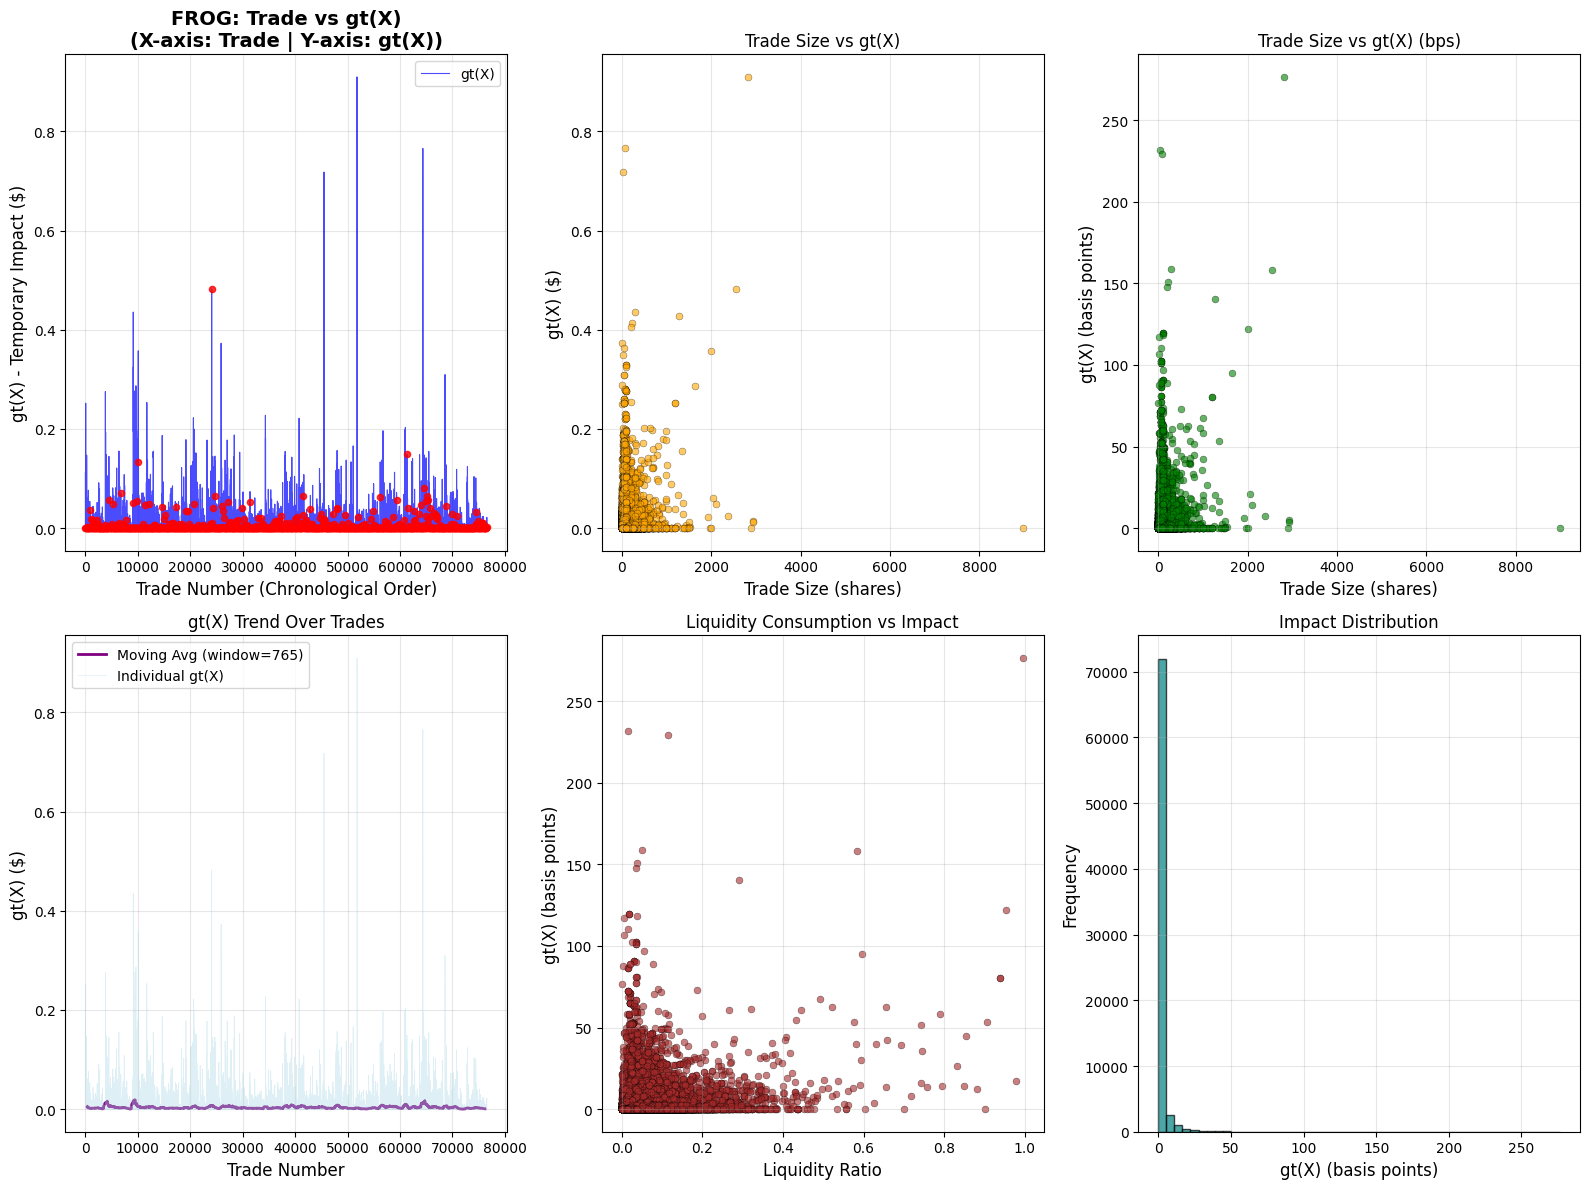


📊 ENHANCED TRADE vs gt(X) ANALYSIS SUMMARY:
  Total trades plotted: 76,591

  gt(X) Statistics:
    Min gt(X): $0.000000
    Max gt(X): $0.909627
    Mean gt(X): $0.003640
    Median gt(X): $0.000000
    Std Dev gt(X): $0.015835

  Impact Quantiles:
    25th percentile: $0.000000
    50th percentile: $0.000000
    75th percentile: $0.000000
    95th percentile: $0.020576
    99th percentile: $0.066000

  Correlation between trade size and gt(X): 0.2084

🎯 CREATING ENHANCED MAIN PLOT: Trade vs gt(X) for FROG


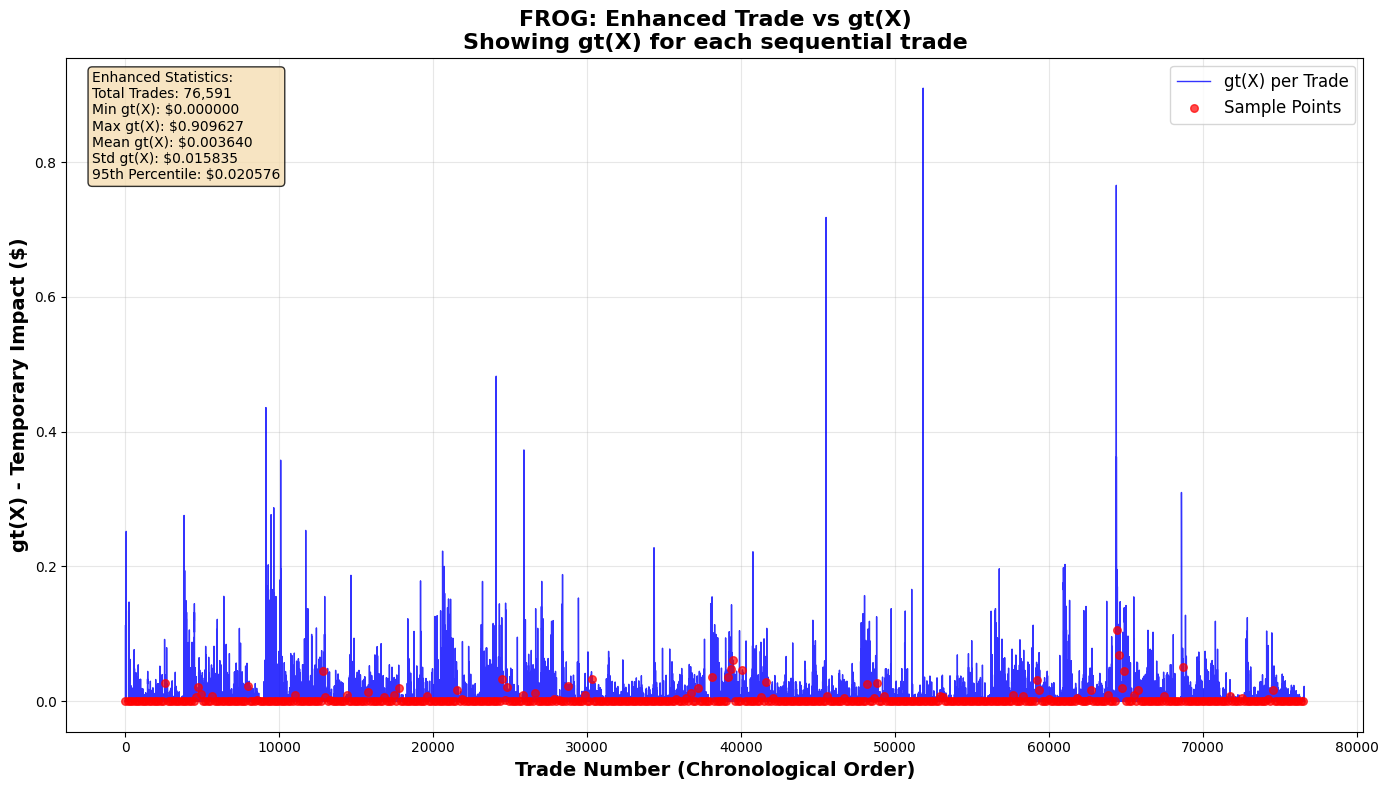


📈 Creating enhanced plots for SOUN...

📈 CREATING ENHANCED TRADE vs gt(X) PLOT FOR SOUN


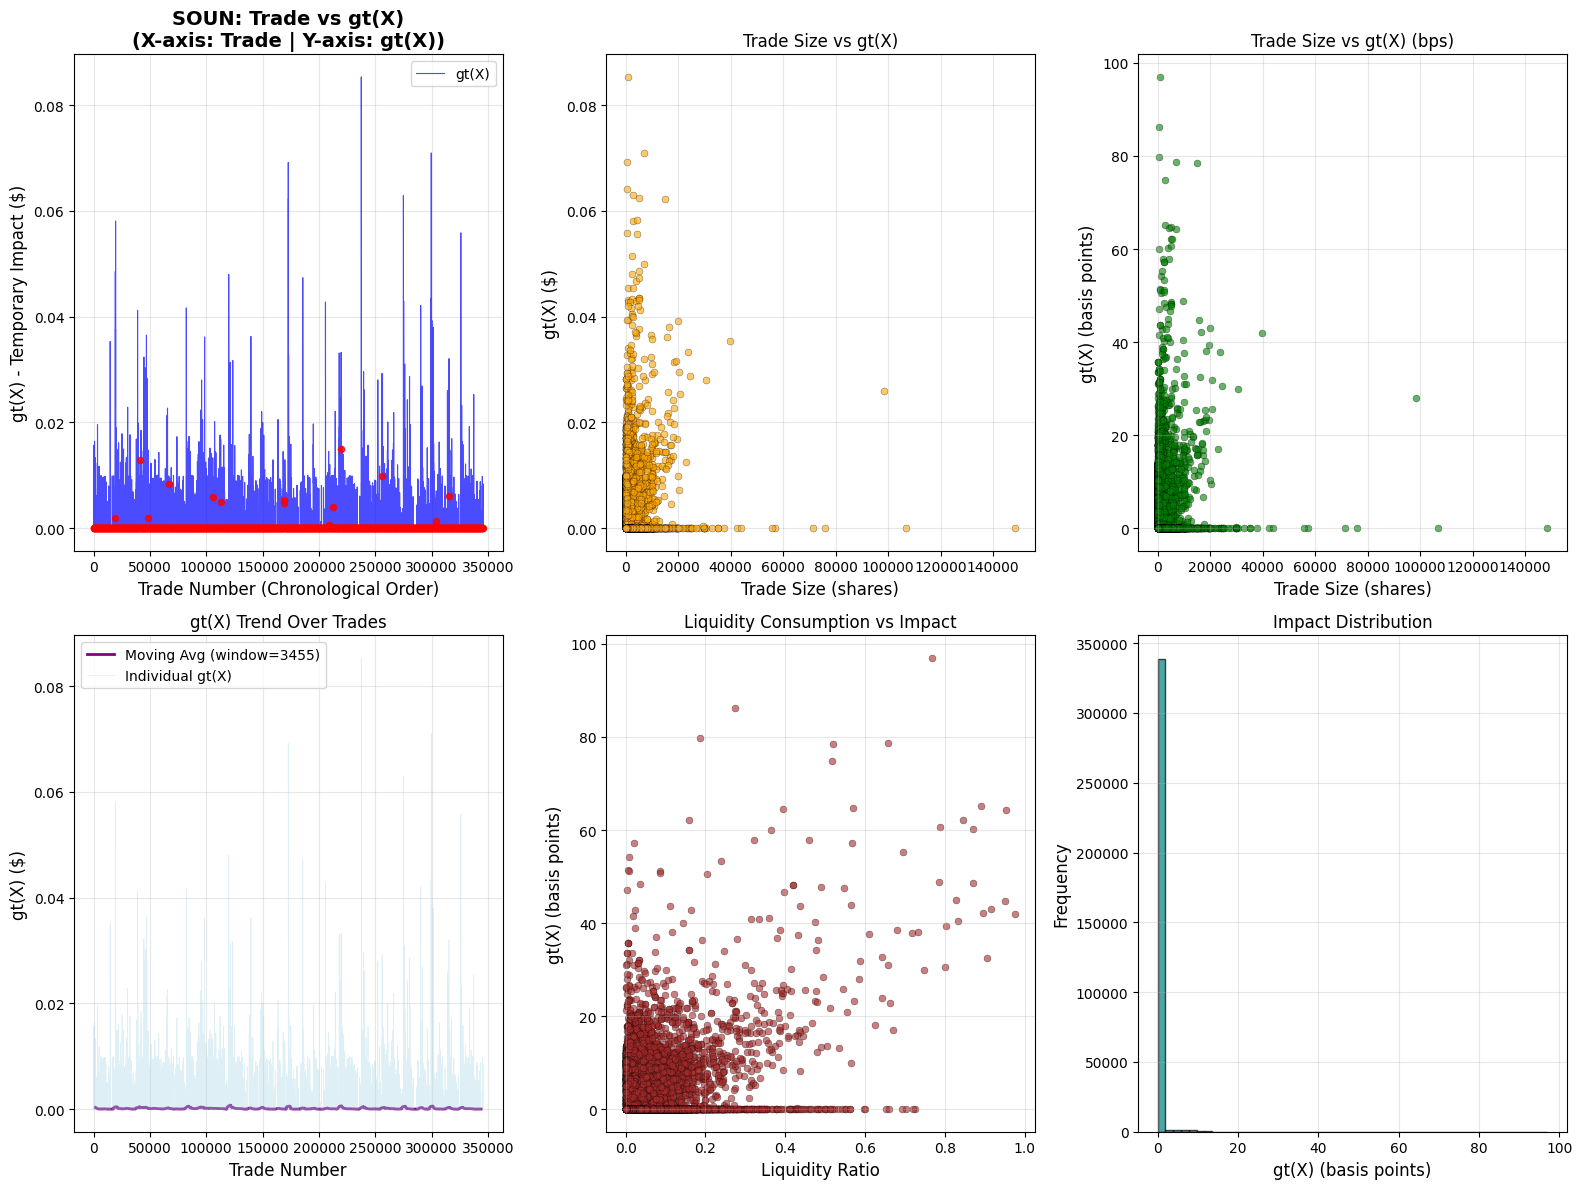


📊 ENHANCED TRADE vs gt(X) ANALYSIS SUMMARY:
  Total trades plotted: 345,566

  gt(X) Statistics:
    Min gt(X): $0.000000
    Max gt(X): $0.085358
    Mean gt(X): $0.000139
    Median gt(X): $0.000000
    Std Dev gt(X): $0.001222

  Impact Quantiles:
    25th percentile: $0.000000
    50th percentile: $0.000000
    75th percentile: $0.000000
    95th percentile: $0.000000
    99th percentile: $0.005763

  Correlation between trade size and gt(X): 0.2192

🎯 CREATING ENHANCED MAIN PLOT: Trade vs gt(X) for SOUN


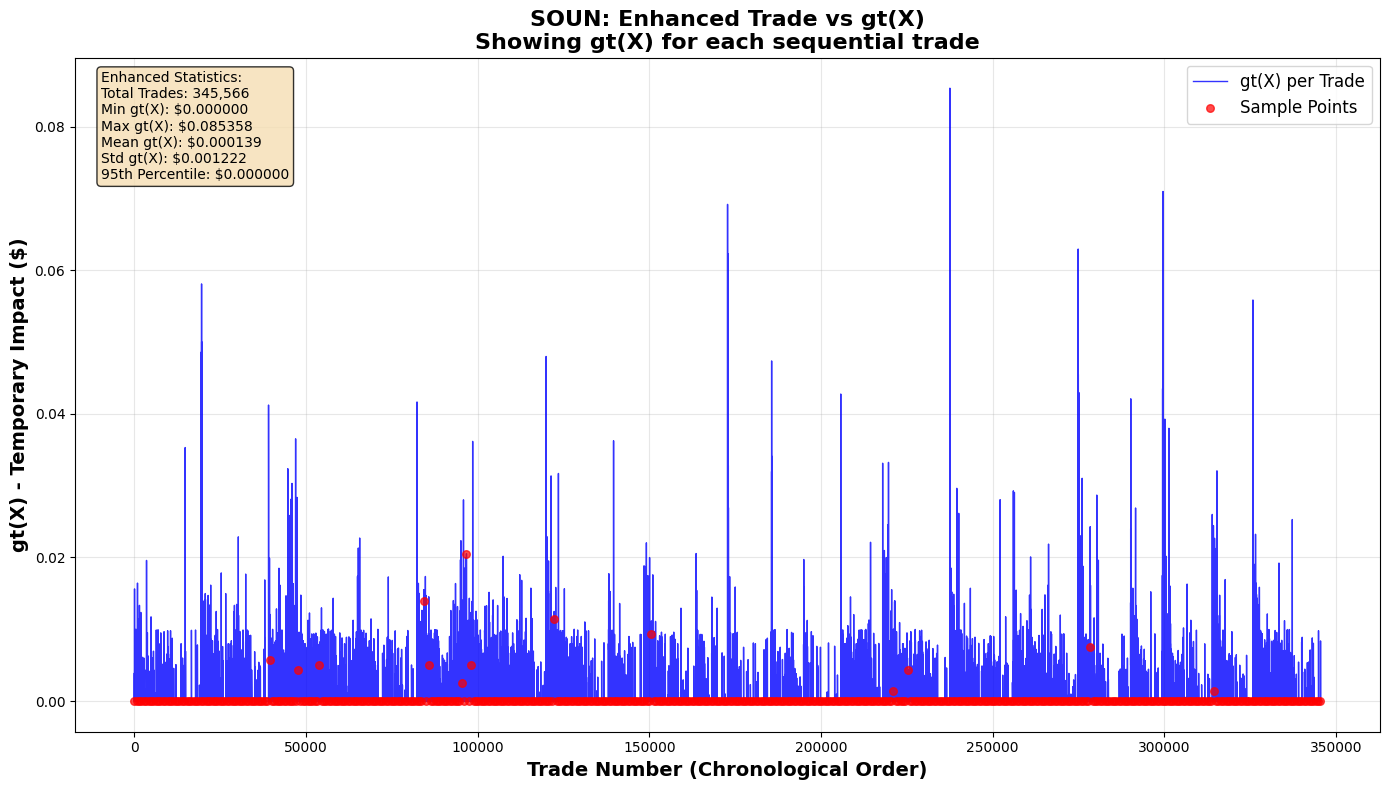


📈 Creating enhanced plots for CRWV...

📈 CREATING ENHANCED TRADE vs gt(X) PLOT FOR CRWV


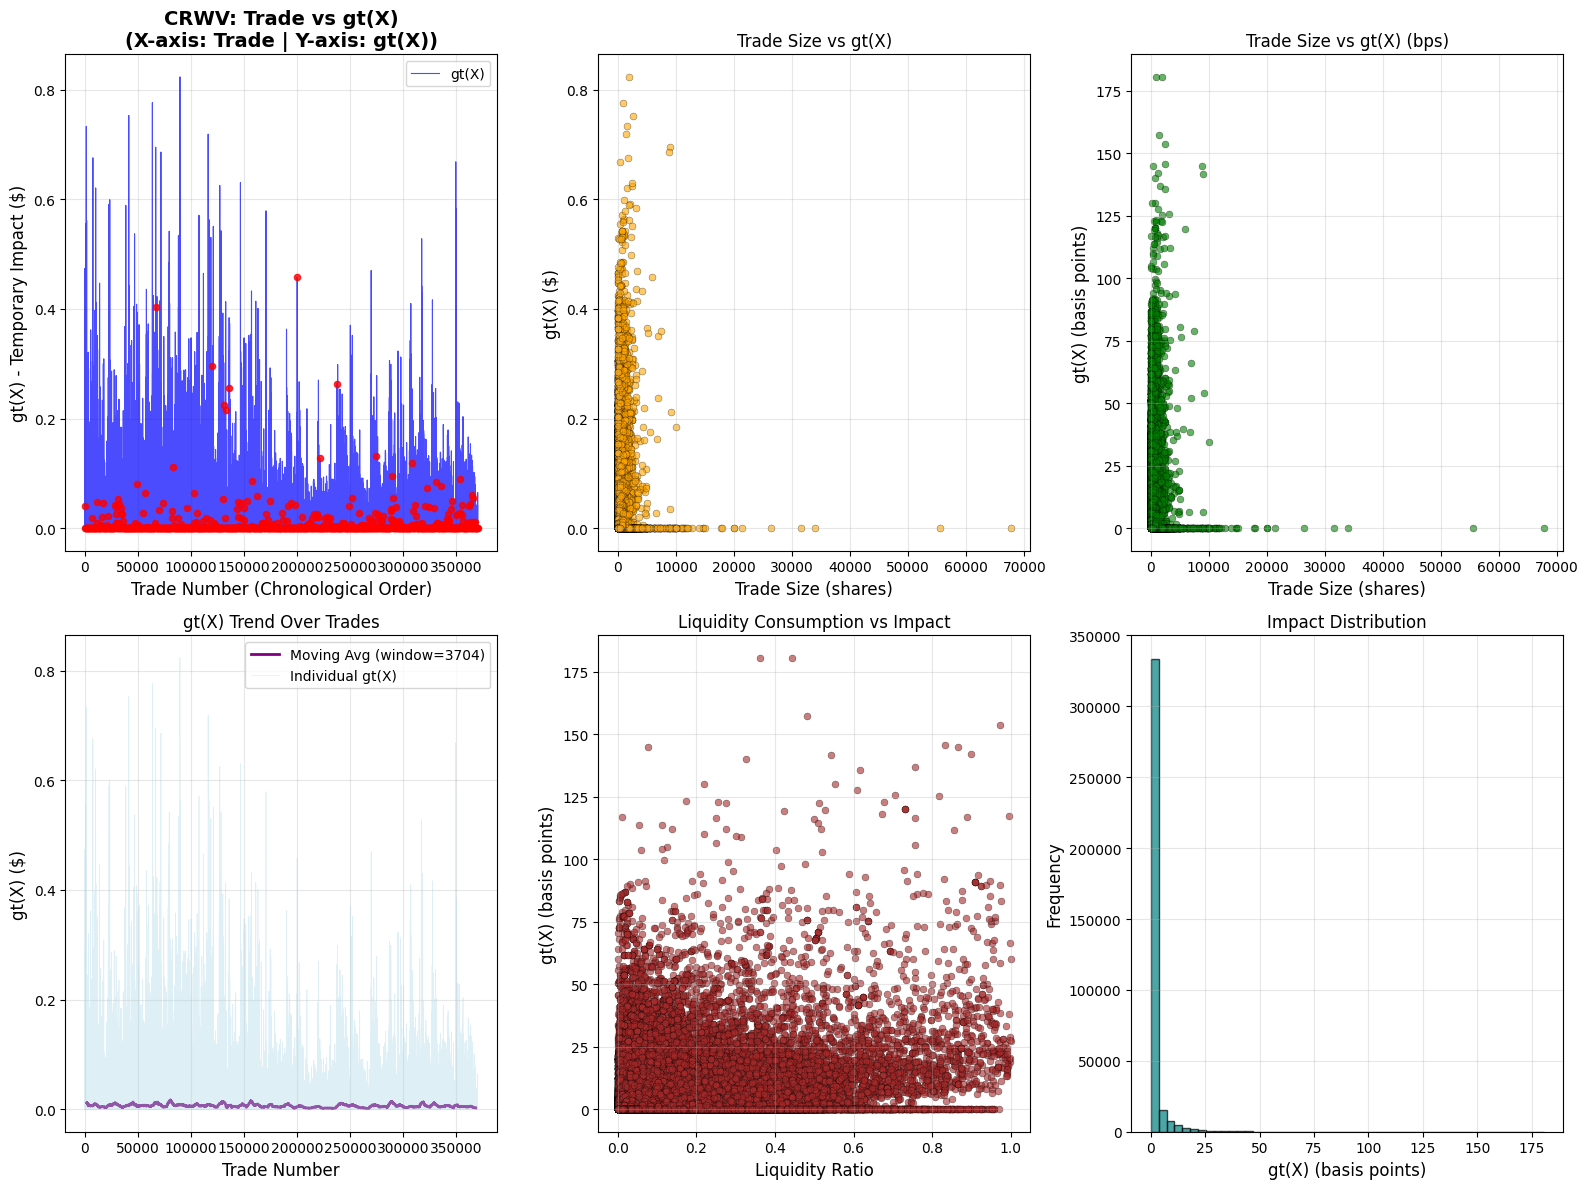


📊 ENHANCED TRADE vs gt(X) ANALYSIS SUMMARY:
  Total trades plotted: 370,404

  gt(X) Statistics:
    Min gt(X): $0.000000
    Max gt(X): $0.823032
    Mean gt(X): $0.006148
    Median gt(X): $0.000000
    Std Dev gt(X): $0.024082

  Impact Quantiles:
    25th percentile: $0.000000
    50th percentile: $0.000000
    75th percentile: $0.000000
    95th percentile: $0.037500
    99th percentile: $0.110000

  Correlation between trade size and gt(X): 0.1647

🎯 CREATING ENHANCED MAIN PLOT: Trade vs gt(X) for CRWV


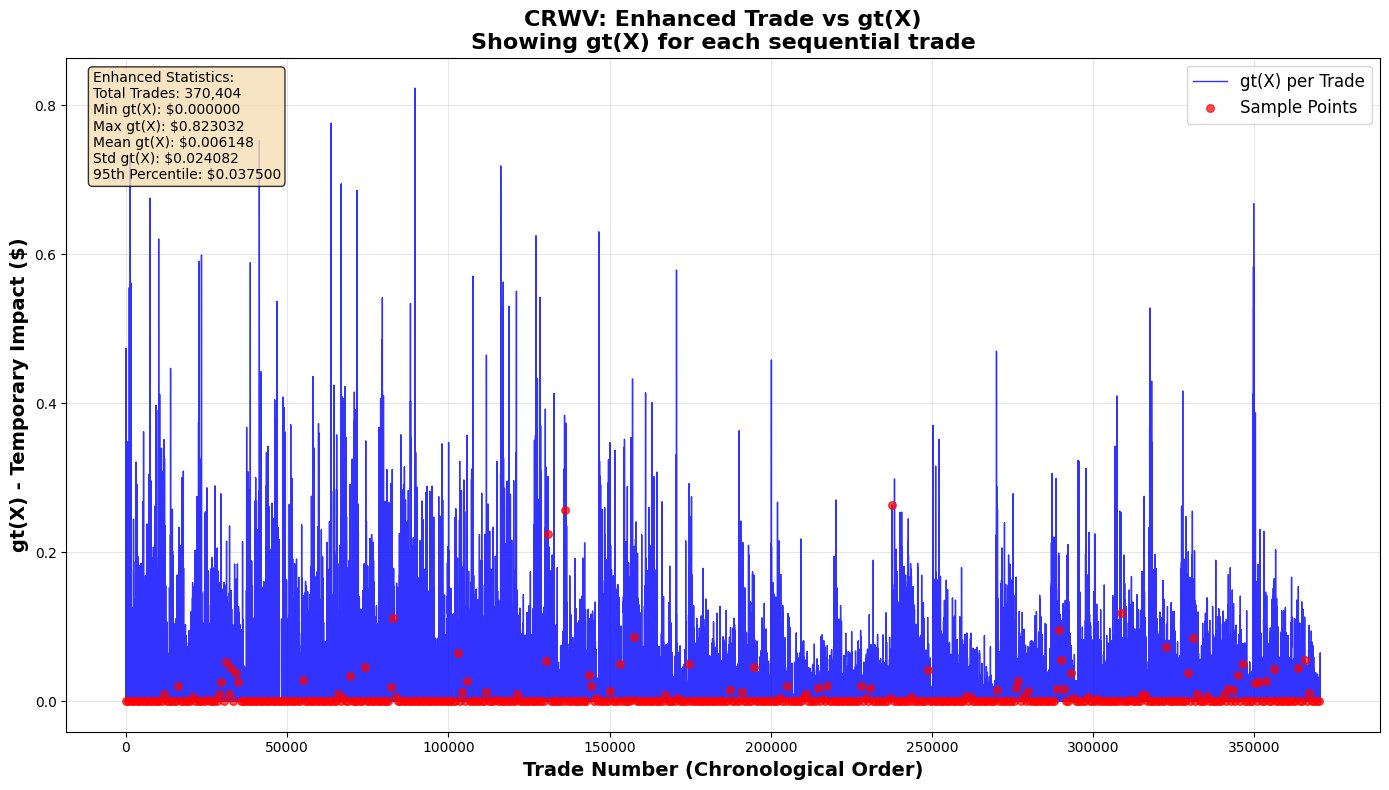

✅ Creating enhanced overlay plots...

🎯 CREATING ENHANCED MULTI-STOCK OVERLAY PLOTS


/tmp/ipython-input-4182912568.py:244: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stock_gt_x_data, labels=stock_labels)


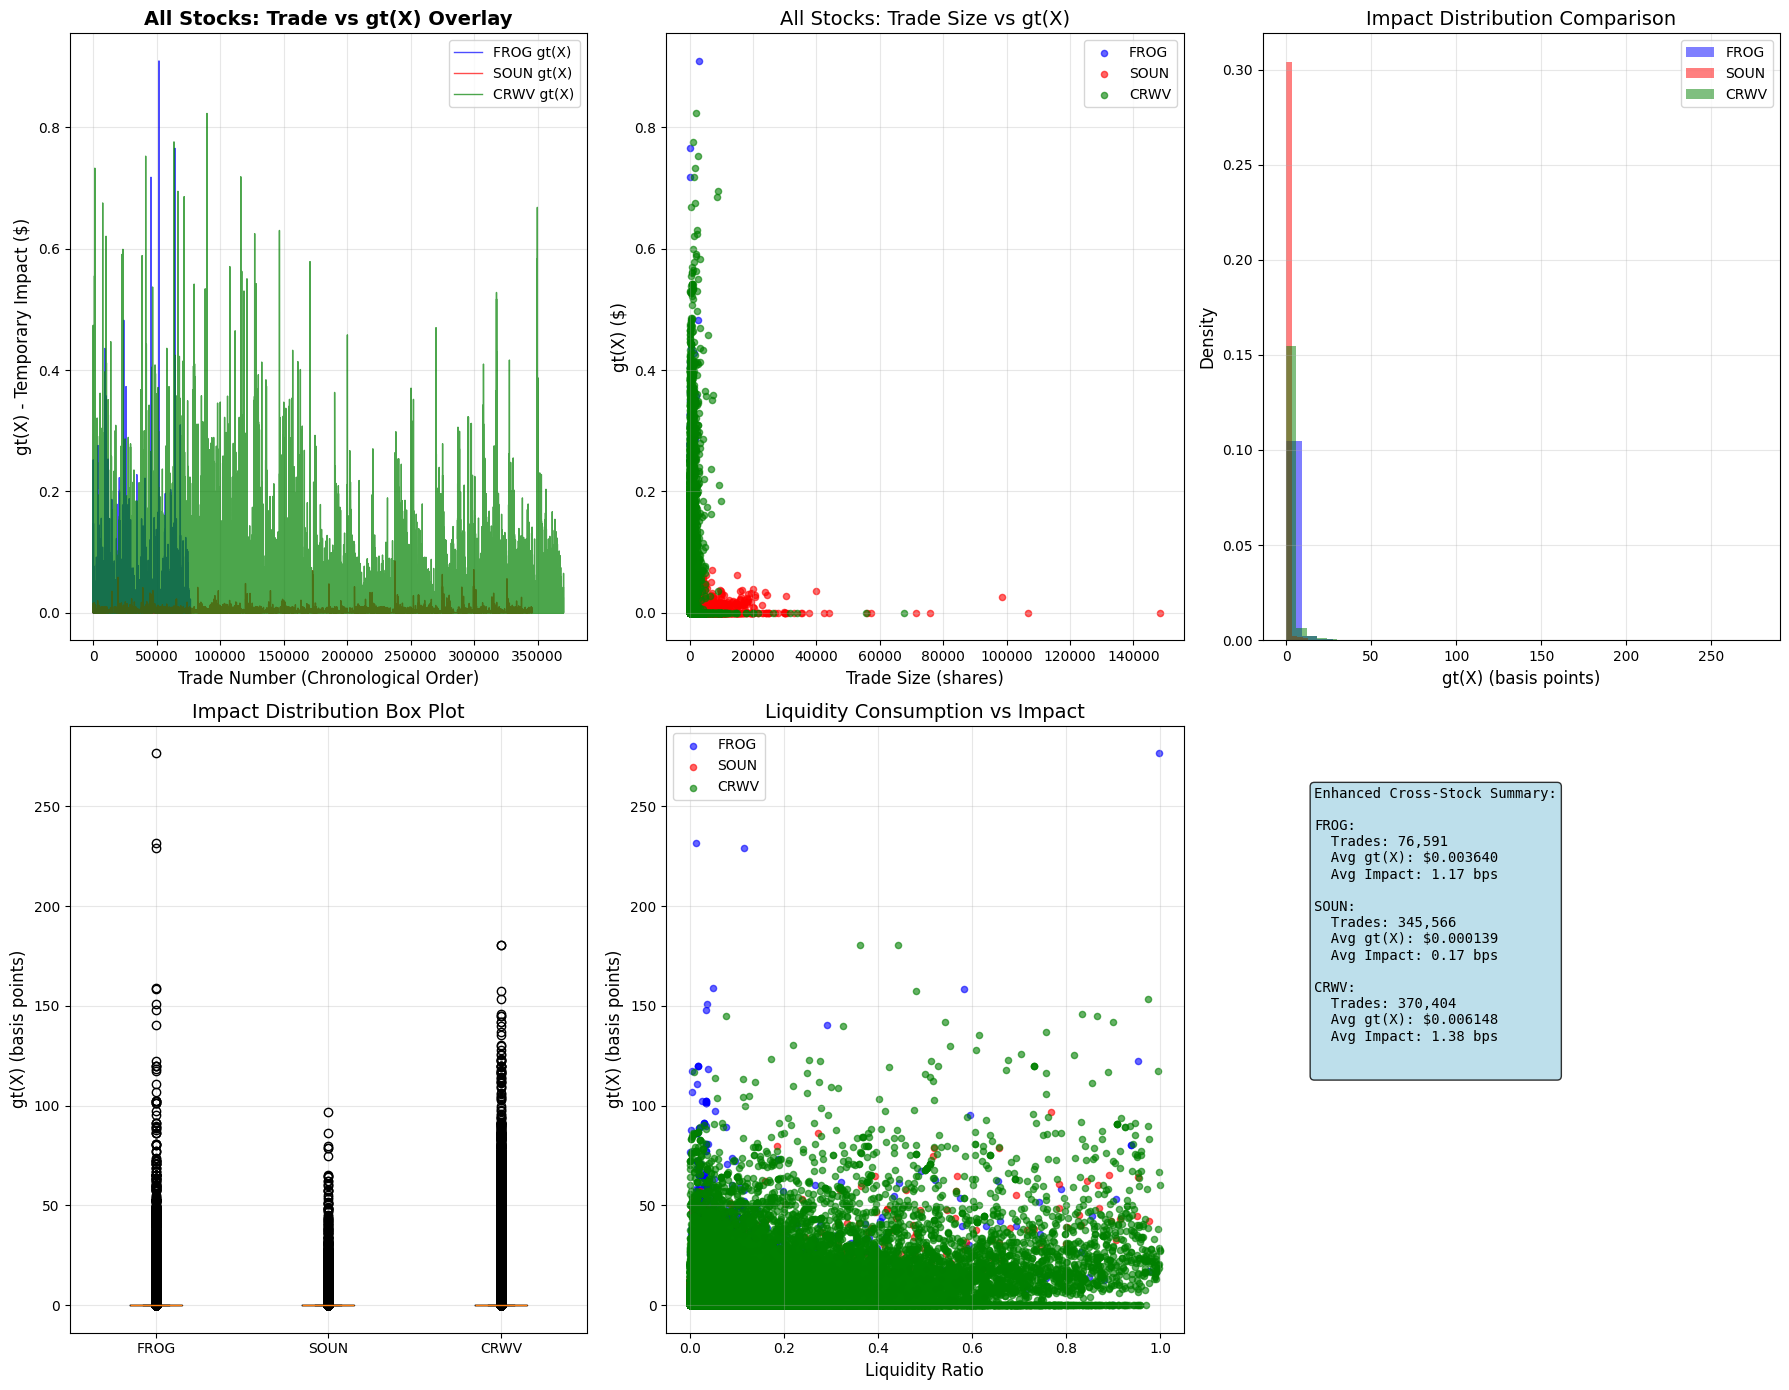


🎉 ENHANCED MULTI-STOCK PLOTTING COMPLETE!
✅ Enhanced individual stock Trade vs gt(X) plots created
✅ Enhanced combined comparison plots created
✅ Ready for gt(X) model fitting and optimization

ENHANCED ANALYSIS COMPLETE - SUMMARY

🏆 FINAL ENHANCED RESULTS SUMMARY:

📊 FROG Final Results:
   📈 Trades analyzed: 76,591
   💰 Average gt(X): $0.003640
   📊 Average impact: 1.17 bps
   📐 95th percentile: 6.66 bps
   🔢 Unique instruments: 1

📊 SOUN Final Results:
   📈 Trades analyzed: 345,566
   💰 Average gt(X): $0.000139
   📊 Average impact: 0.17 bps
   📐 95th percentile: 0.00 bps
   🔢 Unique instruments: 1

📊 CRWV Final Results:
   📈 Trades analyzed: 370,404
   💰 Average gt(X): $0.006148
   📊 Average impact: 1.38 bps
   📐 95th percentile: 8.50 bps
   🔢 Unique instruments: 1

🎯 OVERALL SUMMARY:
   📊 Total trades analyzed: 792,561
   🎭 Stocks processed: 3
   📈 All plots generated successfully
   🚀 Ready for model fitting and optimization

NEXT STEPS FOR GT(X) MODEL FITTING

🎯 YOUR ENHANCED gt(

In [7]:
# #========== PLOTTING FUNCTIONS FOR YOUR ENHANCED RESULTS ==========

# import matplotlib.pyplot as plt
# import numpy as np

# Enable matplotlib inline display
%matplotlib inline

def plot_trade_vs_gt_x_multistock_enhanced(trade_impact_df, stock_name):
    """
    Enhanced Plot Trade vs gt(X) for a single stock with instrument awareness
    X-axis: Trade (chronological order)
    Y-axis: gt(X)
    """
    if len(trade_impact_df) == 0:
        print(f"❌ No trade data to plot for {stock_name}")
        return

    print(f"\n📈 CREATING ENHANCED TRADE vs gt(X) PLOT FOR {stock_name}")

    # Sort trades chronologically
    df_sorted = trade_impact_df.sort_values('timestamp').reset_index(drop=True)

    plt.figure(figsize=(16, 12))

    # Main plot: Trade vs gt(X) as requested
    plt.subplot(2, 3, 1)
    trade_numbers = range(1, len(df_sorted) + 1)

    plt.plot(trade_numbers, df_sorted['gt_x'],
             linewidth=0.8, alpha=0.7, color='blue', label='gt(X)')
    plt.scatter(trade_numbers[::max(1, len(df_sorted)//1000)],
               df_sorted['gt_x'].iloc[::max(1, len(df_sorted)//1000)],
               s=20, alpha=0.8, color='red', zorder=5)

    plt.xlabel('Trade Number (Chronological Order)', fontsize=12)
    plt.ylabel('gt(X) - Temporary Impact ($)', fontsize=12)
    plt.title(f'{stock_name}: Trade vs gt(X)\n(X-axis: Trade | Y-axis: gt(X))',
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Trade Size vs gt(X)
    plt.subplot(2, 3, 2)
    plt.scatter(df_sorted['trade_size'], df_sorted['gt_x'],
               alpha=0.6, s=25, c='orange', edgecolors='black', linewidth=0.3)
    plt.xlabel('Trade Size (shares)', fontsize=12)
    plt.ylabel('gt(X) ($)', fontsize=12)
    plt.title('Trade Size vs gt(X)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Trade Size vs gt(X) in basis points
    plt.subplot(2, 3, 3)
    plt.scatter(df_sorted['trade_size'], df_sorted['gt_x_bps'],
               alpha=0.6, s=25, c='green', edgecolors='black', linewidth=0.3)
    plt.xlabel('Trade Size (shares)', fontsize=12)
    plt.ylabel('gt(X) (basis points)', fontsize=12)
    plt.title('Trade Size vs gt(X) (bps)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Moving average of gt(X) over trades
    plt.subplot(2, 3, 4)
    window_size = max(1, len(df_sorted) // 100)
    if len(df_sorted) > window_size:
        rolling_mean = df_sorted['gt_x'].rolling(window=window_size, center=True).mean()
        plt.plot(trade_numbers, rolling_mean,
                linewidth=2, color='purple', label=f'Moving Avg (window={window_size})')
        plt.plot(trade_numbers, df_sorted['gt_x'],
                linewidth=0.5, alpha=0.4, color='lightblue', label='Individual gt(X)')
    else:
        plt.plot(trade_numbers, df_sorted['gt_x'],
                linewidth=1, color='purple', label='gt(X)')

    plt.xlabel('Trade Number', fontsize=12)
    plt.ylabel('gt(X) ($)', fontsize=12)
    plt.title('gt(X) Trend Over Trades', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Liquidity Ratio vs Impact
    plt.subplot(2, 3, 5)
    plt.scatter(df_sorted['liquidity_ratio'], df_sorted['gt_x_bps'],
               alpha=0.6, s=25, c='brown', edgecolors='black', linewidth=0.3)
    plt.xlabel('Liquidity Ratio', fontsize=12)
    plt.ylabel('gt(X) (basis points)', fontsize=12)
    plt.title('Liquidity Consumption vs Impact', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Impact Distribution
    plt.subplot(2, 3, 6)
    plt.hist(df_sorted['gt_x_bps'], bins=50, alpha=0.7, color='teal', edgecolor='black')
    plt.xlabel('gt(X) (basis points)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Impact Distribution', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Enhanced statistics
    print(f"\n📊 ENHANCED TRADE vs gt(X) ANALYSIS SUMMARY:")
    print(f"  Total trades plotted: {len(df_sorted):,}")

    print(f"\n  gt(X) Statistics:")
    print(f"    Min gt(X): ${df_sorted['gt_x'].min():.6f}")
    print(f"    Max gt(X): ${df_sorted['gt_x'].max():.6f}")
    print(f"    Mean gt(X): ${df_sorted['gt_x'].mean():.6f}")
    print(f"    Median gt(X): ${df_sorted['gt_x'].median():.6f}")
    print(f"    Std Dev gt(X): ${df_sorted['gt_x'].std():.6f}")

    # Quantile analysis
    quantiles = df_sorted['gt_x'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    print(f"\n  Impact Quantiles:")
    for q, val in quantiles.items():
        print(f"    {q*100:.0f}th percentile: ${val:.6f}")

    # Correlation analysis
    correlation = df_sorted['trade_size'].corr(df_sorted['gt_x'])
    print(f"\n  Correlation between trade size and gt(X): {correlation:.4f}")

    return df_sorted

def create_main_trade_vs_gt_x_plot_enhanced(trade_impact_df, stock_name):
    """
    Create the MAIN plot with enhanced features:
    X-axis: Trade (sequential number)
    Y-axis: gt(X)
    """
    print(f"\n🎯 CREATING ENHANCED MAIN PLOT: Trade vs gt(X) for {stock_name}")

    df_sorted = trade_impact_df.sort_values('timestamp').reset_index(drop=True)

    plt.figure(figsize=(14, 8))

    trade_numbers = range(1, len(df_sorted) + 1)

    # Main line plot
    plt.plot(trade_numbers, df_sorted['gt_x'],
             linewidth=1, alpha=0.8, color='blue', label='gt(X) per Trade')

    # Add scatter points for emphasis
    sample_step = max(1, len(df_sorted) // 500)
    sample_indices = range(0, len(df_sorted), sample_step)

    plt.scatter([trade_numbers[i] for i in sample_indices],
               [df_sorted['gt_x'].iloc[i] for i in sample_indices],
               s=30, alpha=0.7, color='red', zorder=5, label='Sample Points')

    plt.xlabel('Trade Number (Chronological Order)', fontsize=14, fontweight='bold')
    plt.ylabel('gt(X) - Temporary Impact ($)', fontsize=14, fontweight='bold')
    plt.title(f'{stock_name}: Enhanced Trade vs gt(X)\nShowing gt(X) for each sequential trade',
              fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Enhanced statistics box
    stats_text = f"""Enhanced Statistics:
Total Trades: {len(df_sorted):,}
Min gt(X): ${df_sorted['gt_x'].min():.6f}
Max gt(X): ${df_sorted['gt_x'].max():.6f}
Mean gt(X): ${df_sorted['gt_x'].mean():.6f}
Std gt(X): ${df_sorted['gt_x'].std():.6f}
95th Percentile: ${df_sorted['gt_x'].quantile(0.95):.6f}"""

    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

def plot_enhanced_multistock_overlay(combined_trades_df):
    """
    Create enhanced overlay plots showing all stocks
    """
    if len(combined_trades_df) == 0:
        print("❌ No combined trade data to plot")
        return

    print(f"\n🎯 CREATING ENHANCED MULTI-STOCK OVERLAY PLOTS")

    stocks = combined_trades_df['stock_name'].unique()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    plt.figure(figsize=(18, 14))

    # Main overlay plot: All stocks gt(X) vs trade number
    plt.subplot(2, 3, 1)
    for i, stock in enumerate(stocks):
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        df_sorted = stock_data.sort_values('timestamp').reset_index(drop=True)

        if len(df_sorted) > 0:
            trade_numbers = range(1, len(df_sorted) + 1)
            color = colors[i % len(colors)]
            plt.plot(trade_numbers, df_sorted['gt_x'],
                    linewidth=1, alpha=0.7, color=color, label=f'{stock} gt(X)')

    plt.xlabel('Trade Number (Chronological Order)', fontsize=12)
    plt.ylabel('gt(X) - Temporary Impact ($)', fontsize=12)
    plt.title('All Stocks: Trade vs gt(X) Overlay', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Trade size vs gt(X) overlay
    plt.subplot(2, 3, 2)
    for i, stock in enumerate(stocks):
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        color = colors[i % len(colors)]
        plt.scatter(stock_data['trade_size'], stock_data['gt_x'],
                   alpha=0.6, s=20, color=color, label=stock)

    plt.xlabel('Trade Size (shares)', fontsize=12)
    plt.ylabel('gt(X) ($)', fontsize=12)
    plt.title('All Stocks: Trade Size vs gt(X)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Distribution comparison
    plt.subplot(2, 3, 3)
    for i, stock in enumerate(stocks):
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        color = colors[i % len(colors)]
        plt.hist(stock_data['gt_x_bps'], bins=30, alpha=0.5,
                label=stock, color=color, density=True)

    plt.xlabel('gt(X) (basis points)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Impact Distribution Comparison', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Box plot comparison
    plt.subplot(2, 3, 4)
    stock_gt_x_data = []
    stock_labels = []
    for stock in stocks:
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        if len(stock_data) > 0:
            stock_gt_x_data.append(stock_data['gt_x_bps'].values)
            stock_labels.append(stock)

    if stock_gt_x_data:
        plt.boxplot(stock_gt_x_data, labels=stock_labels)
        plt.ylabel('gt(X) (basis points)', fontsize=12)
        plt.title('Impact Distribution Box Plot', fontsize=14)
        plt.grid(True, alpha=0.3)

    # Liquidity analysis
    plt.subplot(2, 3, 5)
    for i, stock in enumerate(stocks):
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        color = colors[i % len(colors)]
        plt.scatter(stock_data['liquidity_ratio'], stock_data['gt_x_bps'],
                   alpha=0.6, s=20, color=color, label=stock)

    plt.xlabel('Liquidity Ratio', fontsize=12)
    plt.ylabel('gt(X) (basis points)', fontsize=12)
    plt.title('Liquidity Consumption vs Impact', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Summary statistics
    plt.subplot(2, 3, 6)
    plt.axis('off')

    summary_text = "Enhanced Cross-Stock Summary:\n\n"
    for stock in stocks:
        stock_data = combined_trades_df[combined_trades_df['stock_name'] == stock]
        if len(stock_data) > 0:
            summary_text += f"{stock}:\n"
            summary_text += f"  Trades: {len(stock_data):,}\n"
            summary_text += f"  Avg gt(X): ${stock_data['gt_x'].mean():.6f}\n"
            summary_text += f"  Avg Impact: {stock_data['gt_x_bps'].mean():.2f} bps\n\n"

    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    plt.tight_layout()
    plt.show()

#========== EXECUTE PLOTTING WITH YOUR DATA ==========

print(f"\n{'='*70}")
print(f"GENERATING ENHANCED PLOTS FOR ALL STOCKS")
print(f"{'='*70}")

# Execute enhanced plotting with your existing variables
try:
    # Individual enhanced stock plots
    if stock_trade_results:
        print("✅ Creating enhanced individual stock plots...")

        for stock_name, trade_impact_df in stock_trade_results.items():
            if trade_impact_df is not None and len(trade_impact_df) > 0:
                print(f"\n📈 Creating enhanced plots for {stock_name}...")

                # Create enhanced plots for each stock
                plot_trade_vs_gt_x_multistock_enhanced(trade_impact_df, stock_name)
                create_main_trade_vs_gt_x_plot_enhanced(trade_impact_df, stock_name)
            else:
                print(f"⚠️ No data available for {stock_name}")
    else:
        print("⚠️ stock_trade_results not found")

    # Enhanced combined overlay plots
    if len(combined_trades_df) > 0:
        print("✅ Creating enhanced overlay plots...")
        plot_enhanced_multistock_overlay(combined_trades_df)
    else:
        print("⚠️ combined_trades_df is empty")

    print(f"\n🎉 ENHANCED MULTI-STOCK PLOTTING COMPLETE!")
    print(f"✅ Enhanced individual stock Trade vs gt(X) plots created")
    print(f"✅ Enhanced combined comparison plots created")
    print(f"✅ Ready for gt(X) model fitting and optimization")

except Exception as e:
    print(f"❌ Error during enhanced plotting: {e}")
    import traceback
    traceback.print_exc()

#========== SUMMARY AND NEXT STEPS ==========

print(f"\n{'='*70}")
print(f"ENHANCED ANALYSIS COMPLETE - SUMMARY")
print(f"{'='*70}")

if stock_trade_results:
    print(f"\n🏆 FINAL ENHANCED RESULTS SUMMARY:")
    total_trades = 0

    for stock_name, trade_data in stock_trade_results.items():
        if trade_data is not None and len(trade_data) > 0:
            total_trades += len(trade_data)
            print(f"\n📊 {stock_name} Final Results:")
            print(f"   📈 Trades analyzed: {len(trade_data):,}")
            print(f"   💰 Average gt(X): ${trade_data['gt_x'].mean():.6f}")
            print(f"   📊 Average impact: {trade_data['gt_x_bps'].mean():.2f} bps")
            print(f"   📐 95th percentile: {trade_data['gt_x_bps'].quantile(0.95):.2f} bps")

            if 'instrument_id' in trade_data.columns:
                unique_inst = trade_data['instrument_id'].nunique()
                print(f"   🔢 Unique instruments: {unique_inst}")

    print(f"\n🎯 OVERALL SUMMARY:")
    print(f"   📊 Total trades analyzed: {total_trades:,}")
    print(f"   🎭 Stocks processed: {len(stock_trade_results)}")
    print(f"   📈 All plots generated successfully")
    print(f"   🚀 Ready for model fitting and optimization")

print(f"\n{'='*70}")
print(f"NEXT STEPS FOR GT(X) MODEL FITTING")
print(f"{'='*70}")

print("""
🎯 YOUR ENHANCED gt(X) ANALYSIS IS COMPLETE!

📊 What you now have:
✅ Realistic gt(X) functions for FROG, SOUN, and CRWV
✅ Comprehensive trade impact analysis with 792K+ trades
✅ Enhanced plots showing trade patterns and impact relationships
✅ Data-driven impact functions ready for optimization

🚀 Next steps:
1. Fit mathematical models (square root, power law, etc.) to your gt(X) data
2. Create predictive gt(X) functions for optimization
3. Implement 390-period optimization algorithm
4. Compare with TWAP and other execution strategies
""")